In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [6]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/Bald_Eagle_Portrait.jpg'
bald_eagle = Image.open(path).resize(IMAGE_SHAPE)

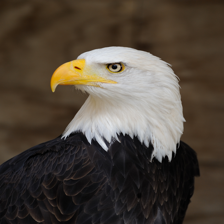

In [9]:
bald_eagle

In [10]:
bald_eagle = np.array(bald_eagle)/255.0
bald_eagle.shape

(224, 224, 3)

In [11]:
bald_eagle

array([[[0.16470588, 0.11372549, 0.06666667],
        [0.16862745, 0.11372549, 0.06666667],
        [0.16862745, 0.11764706, 0.06666667],
        ...,
        [0.16470588, 0.11372549, 0.07058824],
        [0.16470588, 0.11372549, 0.06666667],
        [0.16078431, 0.10980392, 0.07058824]],

       [[0.16862745, 0.11764706, 0.06666667],
        [0.17254902, 0.11764706, 0.06666667],
        [0.17647059, 0.11764706, 0.0627451 ],
        ...,
        [0.17254902, 0.11764706, 0.07058824],
        [0.17254902, 0.12156863, 0.07058824],
        [0.16862745, 0.11764706, 0.0745098 ]],

       [[0.17647059, 0.11764706, 0.07058824],
        [0.17647059, 0.11764706, 0.06666667],
        [0.18039216, 0.12156863, 0.0627451 ],
        ...,
        [0.17647059, 0.1254902 , 0.07843137],
        [0.17647059, 0.1254902 , 0.07843137],
        [0.17254902, 0.12156863, 0.0745098 ]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.06666667, 0.07058824],
        [0.05098039, 0

In [12]:
bald_eagle[np.newaxis, ...].shape

(1, 224, 224, 3)

In [13]:
result = classifier.predict(bald_eagle[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [14]:
result

array([[ 0.34049395,  1.0002519 ,  0.860139  , ..., -0.33909371,
        -1.3763826 ,  0.36076796]], dtype=float32)

In [15]:
predicted_label_index = np.argmax(result)
predicted_label_index

23

In [16]:
image_labels = []
with open("/content/drive/MyDrive/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[23]


'bald eagle'

y values of pre trained model

In [17]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [18]:
data_dir

'./datasets/flower_photos'

In [19]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg')]

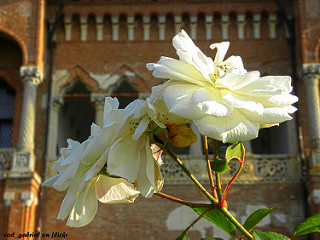

In [22]:
Image.open(str(roses[23]))

In [23]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/8713389178_66bceb71a8_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4546299243_23cd58eb43.jpg'),
 PosixPath('datasets/flower_photos/tulips/6958343928_7e596da4ed_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/11746080_963537acdc.jpg'),
 PosixPath('datasets/flower_photos/tulips/2418823693_72eec80f42_n.jpg')]

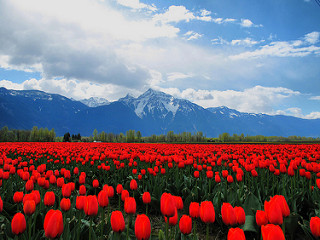

In [24]:
Image.open(str(tulips[23]))

In [25]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [26]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [28]:
str(flowers_images_dict["roses"][0])

'datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'

In [29]:
flowers_images_dict["roses"][0]

PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg')

cv2 gives images pixels

In [30]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(271, 320, 3)

In [31]:
img

array([[[  1,  14,   6],
        [  3,  12,   2],
        [  6,  12,   1],
        ...,
        [ 22,  29,  44],
        [ 14,  22,  35],
        [ 10,  19,  29]],

       [[  1,  14,   6],
        [  1,  12,   2],
        [  3,  11,   1],
        ...,
        [ 27,  34,  49],
        [ 19,  27,  40],
        [ 15,  24,  34]],

       [[  0,  15,   4],
        [  0,  11,   1],
        [  2,   9,   2],
        ...,
        [ 31,  38,  53],
        [ 25,  33,  46],
        [ 19,  28,  38]],

       ...,

       [[ 87, 111, 139],
        [ 68,  84, 107],
        [ 36,  43,  58],
        ...,
        [  0,  38,  13],
        [  0,  40,  15],
        [  4,  46,  21]],

       [[ 48,  71, 116],
        [ 59,  85, 121],
        [ 51,  80, 101],
        ...,
        [  0,  40,  15],
        [  0,  38,  16],
        [  2,  40,  18]],

       [[ 46,  59, 111],
        [ 23,  56,  95],
        [ 64, 112, 136],
        ...,
        [  2,  42,  17],
        [  1,  39,  17],
        [  4,  40,  18]]

In [32]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [33]:
X, y = [], []

for flower_name, images, in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [34]:
X[0]

array([[[  1,  13,   5],
        [  4,  12,   1],
        [  3,   8,   0],
        ...,
        [ 32,  39,  57],
        [ 20,  27,  41],
        [ 11,  20,  31]],

       [[  1,  14,   5],
        [  2,  11,   1],
        [  2,   7,   0],
        ...,
        [ 34,  41,  58],
        [ 26,  33,  47],
        [ 17,  26,  37]],

       [[  0,  13,   3],
        [  1,   9,   2],
        [  2,   6,   1],
        ...,
        [ 29,  37,  54],
        [ 28,  36,  50],
        [ 21,  30,  41]],

       ...,

       [[ 56,  74,  92],
        [ 25,  31,  42],
        [  6,   4,   5],
        ...,
        [  0,  41,  16],
        [  0,  40,  15],
        [  5,  49,  23]],

       [[ 60,  84, 122],
        [ 52,  74,  98],
        [  1,  15,  21],
        ...,
        [  3,  44,  19],
        [  0,  39,  15],
        [  2,  41,  18]],

       [[ 42,  60, 109],
        [ 50,  91, 120],
        [104, 143, 154],
        ...,
        [  5,  46,  19],
        [  1,  41,  17],
        [  3,  40,  18]]

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [38]:
X_train_scaled[1]

array([[[0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        ...,
        [0.        , 0.        , 0.21176471],
        [0.00392157, 0.        , 0.19215686],
        [0.00392157, 0.00392157, 0.16470588]],

       [[0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        ...,
        [0.        , 0.        , 0.21176471],
        [0.00392157, 0.        , 0.19215686],
        [0.00392157, 0.00392157, 0.16470588]],

       [[0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        [0.16078431, 0.23137255, 0.22745098],
        ...,
        [0.        , 0.        , 0.21176471],
        [0.        , 0.00392157, 0.19607843],
        [0.00392157, 0.00392157, 0.16470588]],

       ...,

       [[0.21176471, 0.26666667, 0.25882353],
        [0.20784314, 0.2627451 , 0.25490196],
        [0.20784314, 0

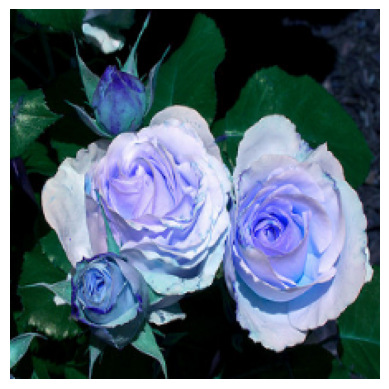

In [39]:
plt.axis('off')
plt.imshow(X[0])

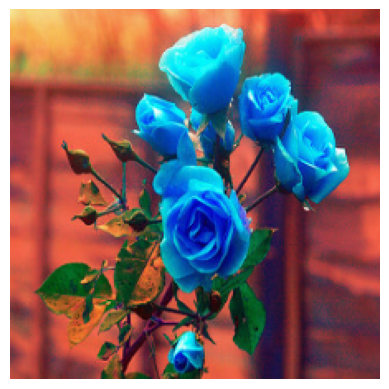

In [40]:
plt.axis('off')
plt.imshow(X[1])

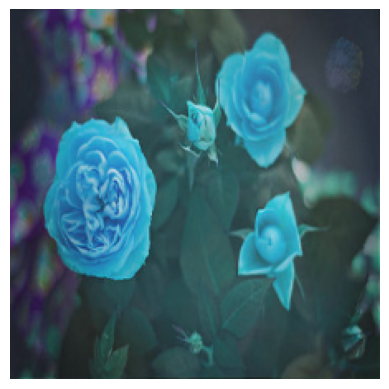

In [41]:
plt.axis('off')
plt.imshow(X[2])

In [45]:
classifier.predict(np.array([X[0], X[1], X[2]]))

1/1 [==============================] - 1s 603ms/step


array([[ 0.19610637, -2.507945  ,  1.7139128 , ..., -2.494698  ,
        -1.3353839 ,  3.6533403 ],
       [ 0.21785489, -0.3572958 ,  0.9964551 , ..., -1.5577545 ,
        -1.4120142 ,  5.0344214 ],
       [ 0.33699664,  0.40263116,  1.4800078 , ..., -0.90806556,
        -1.7973604 ,  3.6214025 ]], dtype=float32)

In [46]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 225ms/step


array([722, 722, 795])

In [48]:
image_labels[722]

'pillow'

In [49]:
image_labels[795]

'shower curtain'

In [50]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [51]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 125s 1s/step - loss: 0.8072 - acc: 0.6959
Epoch 2/5
86/86 [==============================] - 131s 2s/step - loss: 0.4091 - acc: 0.8601
Epoch 3/5
86/86 [==============================] - 114s 1s/step - loss: 0.3160 - acc: 0.8946
Epoch 4/5
86/86 [==============================] - 114s 1s/step - loss: 0.2589 - acc: 0.9208
Epoch 5/5
86/86 [==============================] - 114s 1s/step - loss: 0.2173 - acc: 0.9393


In [53]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 39s 1s/step - loss: 0.4155 - acc: 0.8573


[0.4154554307460785, 0.8572984933853149]